# Feature Correlation and Selection

> Indented block




HELP ME IM DYING

In [1]:
# Mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

# # To let shared files be accessible, go to desired root of shared folder, click "Organise" --> "Add shortcut to Drive" --> "My Drive" --> "ADD SHORTCUT"
os.listdir('/content/drive/My Drive/Group Project/Dataset/') # # list the contents of the directory

Mounted at /content/drive/


['OSMI Mental Health in Tech Surveys 2016 to 2023',
 'Dataset (old, 2016 only)',
 'cleaned_data.xlsx']

In [2]:
import pandas as pd
import numpy as np

# file_path = '/content/'
# file_name = 'cleaned_data(trim_v3).xlsx'

file_path = "/content/drive/My Drive/Group Project/Dataset/"
file_name = 'cleaned_data.xlsx'

try :
    df = pd.read_excel(file_path + file_name)
    print('File read into a pandas DataFrame')
except Exception as e:
    print('Error reading file: ', e)


File read into a pandas DataFrame


In [3]:
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [4]:
display(df.head())
print(df.shape)

,Year,do you know the options for mental health care available under your employer-provided health coverage?,"if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",do you have a family history of mental illness?,would you have been willing to discuss your mental health with your direct supervisor(s)?,have you had a mental health disorder in the past?,have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?",do you currently have a mental health disorder?,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,why or why not?,would you be willing to bring up a physical health issue with a potential employer in an interview?,how many employees does your company or organization have?,was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,what country do you work in?,briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,why or why not?.1,would you bring up your mental health with a potential employer in an interview?,"has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?","overall, how much importance does your employer place on physical health?",what us state or territory do you work in?,did you ever discuss your mental health with a previous coworker(s)?,how willing would you be to share with friends and family that you have a mental illness?,were you aware of the options for mental health care provided by your previous employers?,does your employer offer resources to learn more about mental health disorders and options for seeking help?,have your previous employers provided mental health benefits?,have you ever discussed your mental health with your employer?,have you ever sought treatment for a mental health disorder from a mental health professional?,what is your age?,is your primary role within your company related to tech/it?,did your previous employers provide resources to learn more about mental health disorders and how to seek help?,have you ever had a coworker discuss their or another coworker's mental health with you?,would you feel more comfortable talking to your coworkers about your physical health or your mental health?,have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"overall, how much importance did your previous employer place on physical health?",are you openly identified at work as a person with a mental health issue?,what country do you live in?,did you ever have a previous coworker discuss their or another coworker's mental health with you?,do you have previous employers?,would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,would you have been willing to discuss your mental health with your coworkers at previous employers?,what us state or territory do you live in?,is your employer primarily a tech company/organization?,would you feel comfortable discussing a mental health issue with your coworkers?,was your employer primarily a tech company/organization?,what is your gender?,did you ever discu

(1821, 54)


In [5]:
def replace_nan_and_empty(df):
    df = df.replace(r'^\s*$', "Missing", regex=True)  # Replace whitespace-only strings with NaN
    df = df.replace(r'^\W*$', "Missing", regex=True)  # Replace non-word strings (like punctuation) with NaN
    df = df.fillna("Missing")  # Replace NaN values with "Missing"
    return df

df = replace_nan_and_empty(df)
print(df.isna().sum())

Year                                                                                                                                                                             0
do you know the options for mental health care available under your employer-provided health coverage?                                                                           0
if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?                                             0
do you have a family history of mental illness?                                                                                                                                  0
would you have been willing to discuss your mental health with your direct supervisor(s)?                                                                                        0
have you had a mental health disorder in the past?                                                       

# One hot encoding

In [6]:
# store the original names before label encoding
df_names = list(df.columns)
print(df_names, len(df_names))

['Year', 'do you know the options for mental health care available under your employer-provided health coverage?', 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'do you have a family history of mental illness?', 'would you have been willing to discuss your mental health with your direct supervisor(s)?', 'have you had a mental health disorder in the past?', 'have you ever discussed your mental health with coworkers?', 'overall, how well do you think the tech industry supports employees with mental health issues?', 'overall, how much importance does your employer place on mental health?', 'do you currently have a mental health disorder?', 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?', 'why or why not?', 'would you be willing to bring up a physical health issue with a potential employer in an interview?', 'how many employees

In [7]:
# sort variables into numerical and categorical
for df_name in ['df']:
    temp_df = vars()[df_name]
    vars()[f'numerical_{df_name}'] = temp_df.select_dtypes(include=[np.number]).columns.tolist()
    vars()[f'categorical_{df_name}'] = temp_df.select_dtypes(include=[object]).columns.tolist()
    print(f'numerical_{df_name}: {vars()[f"numerical_{df_name}"]}')
    print(f'categorical_{df_name}: {vars()[f"categorical_{df_name}"]}')
    print()


numerical_df: ['Year', 'have you ever discussed your mental health with coworkers?', 'overall, how well do you think the tech industry supports employees with mental health issues?', 'overall, how much importance does your employer place on mental health?', 'overall, how much importance does your employer place on physical health?', 'did you ever discuss your mental health with a previous coworker(s)?', 'how willing would you be to share with friends and family that you have a mental illness?', 'have you ever discussed your mental health with your employer?', 'have you ever sought treatment for a mental health disorder from a mental health professional?', 'is your primary role within your company related to tech/it?', "have you ever had a coworker discuss their or another coworker's mental health with you?", 'overall, how much importance did your previous employer place on physical health?', 'are you openly identified at work as a person with a mental health issue?', "did you ever have

In [8]:
# # LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'categorical_features'
categorical_features = [col for col in categorical_df if col not in ['briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'why or why not?.1', 'why or why not?']]

# Convert integer categorical features to strings
for col in categorical_features:
    df[col] = df[col].astype(str)

# Apply label encoding and rename columns
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    new_col_name = col + ' (' + ', '.join([f'{k}={v}' for k, v in mapping.items()]) + ')'
    df.rename(columns={col: new_col_name}, inplace=True)

display(df.head())

,Year,"do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)","if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)","do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your direct supervisor(s)? (I Don't Know=0, No=1, Some=2, Yes=3)","have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)",have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?","do you currently have a mental health disorder? (No=0, Yes=1)","would you have felt more comfortable talking to your previous employer about your physical health or your mental health? (Mental health=0, None=1, Physical health=2, Same level of comfort for each=3)",why or why not?,"would you be willing to bring up a physical health issue with a potential employer in an interview? (Maybe=0, No=1, Yes=2)","how many employees does your company or organization have? (1-5=0, 100-500=1, 26-100=2, 500-1000=3, 6-25=4, Missing=5, More than 1000=6)","was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers? (I Don't Know=0, No=1, Yes=2)","what country do you work in? (Afghanistan=0, Albania=1, Angola=2, Argentina=3, Armenia=4, Australia=5, Austria=6, Bangladesh=7, Belarus=8, Belgium=9, Botswana=10, Brazil=11, Bulgaria=12, Cameroon=13, Canada=14, China=15, Colombia=16, Croatia=17, Czech Republic=18, Denmark=19, Eritrea=20, Estonia=21, Ethiopia=22, Finland=23, France=24, Germany=25, Greece=26, Hong Kong=27, Hungary=28, Iceland=29, India=30, Indonesia=31, Ireland=32, Israel=33, Italy=34, Japan=35, Jordan=36, Kazakhstan=37, Kenya=38, Latvia=39, Luxembourg=40, Macedonia=41, Mauritius=42, Mexico=43, Missing=44, Mongolia=45, Netherlands=46, New Zealand=47, Nigeria=48, Norway=49, Other=50, Pakistan=51, Panama=52, Peru=53, Philippines=54, Poland=55, Portugal=56, Romania=57, Russia=58, Saudi Arabia=59, Serbia=60, Singapore=61, Slovenia=62, South Africa=63, Spain=64, Sri Lanka=65, Swaziland=66, Sweden=67, Switzerland=68, Taiwan=69, Turkey=70, Ukraine=71, United Kingdom=72, United States of America=73, Uruguay=74)",briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)? (I Don't Know=0, No=1, Some=2, Yes=3)","have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace? (Maybe=0, No=1, Yes=2)",why or why not?.1,"would you bring up your mental health with a potential employer in an interview? (Maybe=0, No=1, Yes=2)","has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? (I Don't Know=0, No=1, Yes=2)","overall, how much importance does your employer place on physical health?","what us state or territory do you work in? (Alabama=0, Alaska=1, Arizona=2, California=3, Colorado=4, Connecticut=5, District of Columbia=6, Florida=7, Georgia=8, Idaho=9, Illinois=10, Indiana=11, Iowa=12, Kansas=13, Kentucky=14, Louisiana=15, Maine=16, Maryland=17, Massachusetts=18, Michigan=19, Minnesota=20, Missing=21, Mississippi=22, Missouri=23, Montana=24, Nebraska=25, Nevada=26, New Hampshire=27, New Jersey=28, New Mexico=29, New York=30, North Carolina=31, North Dakota=32, Ohio=33, Oklahoma=34, Oregon=35,

# Correlation Analysis
For the pair are quite correlated:
- 'what country do you live in?' & 'what country do you work in?'. Explained variance ratio is [0.987094 0.012906]

- 'what us state or territory do you live in?' & 'what us state or territory do you work in?'). Explained variance ratio is [0.970403 0.029597]


In [9]:
# sort variables into numerical and categorical
for df_name in ['df']:
    temp_df = vars()[df_name]
    vars()[f'numerical_{df_name}'] = temp_df.select_dtypes(include=[np.number]).columns.tolist()
    vars()[f'categorical_{df_name}'] = temp_df.select_dtypes(include=[object]).columns.tolist()
    print(f'numerical_{df_name}: {vars()[f"numerical_{df_name}"]}')
    print(f'categorical_{df_name}: {vars()[f"categorical_{df_name}"]}')
    print()


numerical_df: ['Year', "do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)", "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)", "do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)", "would you have been willing to discuss your mental health with your direct supervisor(s)? (I Don't Know=0, No=1, Some=2, Yes=3)", "have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)", 'have you ever discussed your mental health with coworkers?', 'overall, how well do you think the tech industry supports employees with mental health issues?', 'overall, how much importance does your employer place on mental health?', 'do you currently have a mental health disorder? (No=0, Yes=1)

did your previous em... and did your previous em... are highly correlated.
what country do you ... and what country do you ... are highly correlated.
would you have been ... and would you have been ... are highly correlated.
would you have been ... and do you have previous... are highly correlated.
what us state or ter... and what us state or ter... are highly correlated.


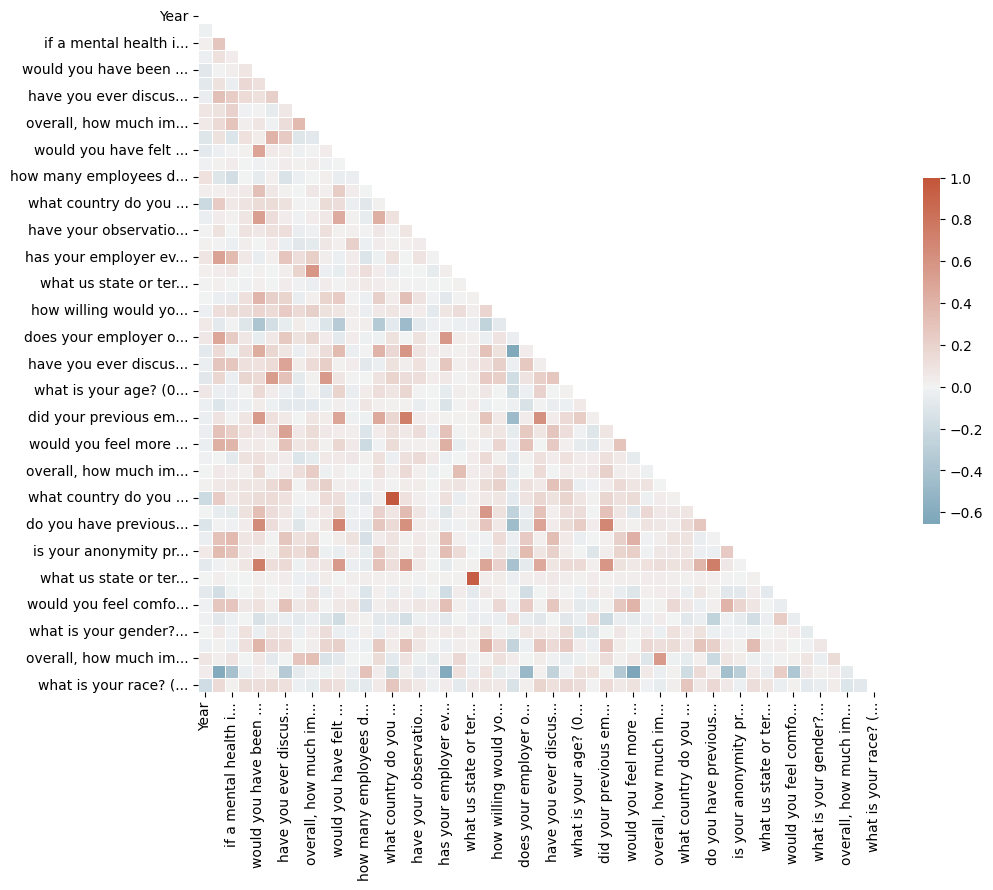

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Abbreviate axis labels if they are longer than a fixed length
max_label_length = 20  # TWEAK THIS
xlabels = [label.get_text()[:max_label_length] + '...' if len(label.get_text()) > max_label_length else label.get_text() for label in ax.get_xticklabels()]
ylabels = [label.get_text()[:max_label_length] + '...' if len(label.get_text()) > max_label_length else label.get_text() for label in ax.get_yticklabels()]
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# Find, save and print highly correlated pairs
threshold = 0.7  # TWEAK PLSb
correlated_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i][:max_label_length] + '...' if len(corr.columns[i]) > max_label_length else corr.columns[i]
            col_j = corr.columns[j][:max_label_length] + '...' if len(corr.columns[j]) > max_label_length else corr.columns[j]
            print(f"{col_i} and {col_j} are highly correlated.")
            correlated_pairs.append((corr.columns[i], corr.columns[j]))

plt.show()

In [11]:
import numpy as np
from sklearn.decomposition import PCA

# Set the print options
np.set_printoptions(suppress=True, precision=6)

# # List of correlated feature pairs
# correlated_pairs should have already been run above

# Define a threshold for the explained variance ratio
threshold = 0.7

for pair in correlated_pairs:
    # Select the pair of features
    X = df[list(pair)].values

    # Apply PCA
    pca = PCA(n_components=2)
    pca.fit(X)

    # Print the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained variance ratio is {explained_variance_ratio}")

    # Check if the explained variance ratio is above the threshold
    if explained_variance_ratio[0] > threshold:
        print(f"The following pair do not provide much additional information and can be reduced to one feature. \n\"{pair[0]}\" \n\"{pair[1]}\" ")
    else:
        print(f"The following pair provides additional information and should be kept. \n\"{pair[0]}\" \n\"{pair[1]}\" ")
    print()

Explained variance ratio is [0.86833 0.13167]
The following pair do not provide much additional information and can be reduced to one feature. 
"did your previous employers provide resources to learn more about mental health disorders and how to seek help? (I Don't Know=0, No=1, Some=2, Yes=3)" 
"did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)? (I Don't Know=0, No=1, Some=2, Yes=3)" 

Explained variance ratio is [0.987094 0.012906]
The following pair do not provide much additional information and can be reduced to one feature. 
"what country do you live in? (Afghanistan=0, Albania=1, Argentina=2, Aruba=3, Australia=4, Austria=5, Bangladesh=6, Belarus=7, Belgium=8, Brazil=9, Bulgaria=10, Cameroon=11, Canada=12, Chile=13, China=14, Colombia=15, Croatia=16, Czech Republic=17, Denmark=18, Estonia=19, Ethiopia=20, Finland=21, France=22, Germany=23, Greece=24, Hong Kong=25, Hungary=26, Iceland=27, India=28, Indo

In [12]:
second_values = [pair[1] for pair in correlated_pairs]

In [13]:
# columns_to_drop = [
#     'what country do you live in? (Afghanistan=0, Albania=1, Argentina=2, Aruba=3, Australia=4, Austria=5, Bangladesh=6, Belarus=7, Belgium=8, Brazil=9, Bulgaria=10, Cameroon=11, Canada=12, Chile=13, China=14, Colombia=15, Croatia=16, Czech Republic=17, Denmark=18, Estonia=19, Ethiopia=20, Finland=21, France=22, Germany=23, Greece=24, Hong Kong=25, Hungary=26, Iceland=27, India=28, Indonesia=29, Ireland=30, Israel=31, Italy=32, Japan=33, Jordan=34, Kazakhstan=35, Kenya=36, Latvia=37, Lithuania=38, Macedonia=39, Mauritius=40, Mexico=41, Missing=42, Mongolia=43, Netherlands=44, New Zealand=45, Nigeria=46, Norway=47, Pakistan=48, Panama=49, Peru=50, Philippines=51, Poland=52, Portugal=53, Romania=54, Russia=55, Saudi Arabia=56, Serbia=57, Singapore=58, Slovenia=59, South Africa=60, Spain=61, Sri Lanka=62, Sweden=63, Switzerland=64, Taiwan=65, Turkey=66, Ukraine=67, United Kingdom=68, United States of America=69, Uruguay=70)',
#     'what us state or territory do you work in? (Alabama=0, Alaska=1, Arizona=2, California=3, Colorado=4, Connecticut=5, District of Columbia=6, Florida=7, Georgia=8, Idaho=9, Illinois=10, Indiana=11, Iowa=12, Kansas=13, Kentucky=14, Louisiana=15, Maine=16, Maryland=17, Massachusetts=18, Michigan=19, Minnesota=20, Missing=21, Mississippi=22, Missouri=23, Montana=24, Nebraska=25, Nevada=26, New Hampshire=27, New Jersey=28, New Mexico=29, New York=30, North Carolina=31, North Dakota=32, Ohio=33, Oklahoma=34, Oregon=35, Pennsylvania=36, Rhode Island=37, South Carolina=38, South Dakota=39, Tennessee=40, Texas=41, Utah=42, Vermont=43, Virginia=44, Washington=45, Wisconsin=46, Wyoming=47)'
# ]
df = df.drop(columns=second_values)

# Feature Selection

In [14]:
# sort variables into numerical and categorical
for df_name in ['df']:
    temp_df = vars()[df_name]
    vars()[f'numerical_{df_name}'] = temp_df.select_dtypes(include=[np.number]).columns.tolist()
    vars()[f'categorical_{df_name}'] = temp_df.select_dtypes(include=[object]).columns.tolist()
    print(f'numerical_{df_name}: {vars()[f"numerical_{df_name}"]}')
    print(f'categorical_{df_name}: {vars()[f"categorical_{df_name}"]}')
    print()


numerical_df: ['Year', "do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)", "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)", "do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)", "have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)", 'have you ever discussed your mental health with coworkers?', 'overall, how well do you think the tech industry supports employees with mental health issues?', 'overall, how much importance does your employer place on mental health?', 'do you currently have a mental health disorder? (No=0, Yes=1)', 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health? (Menta

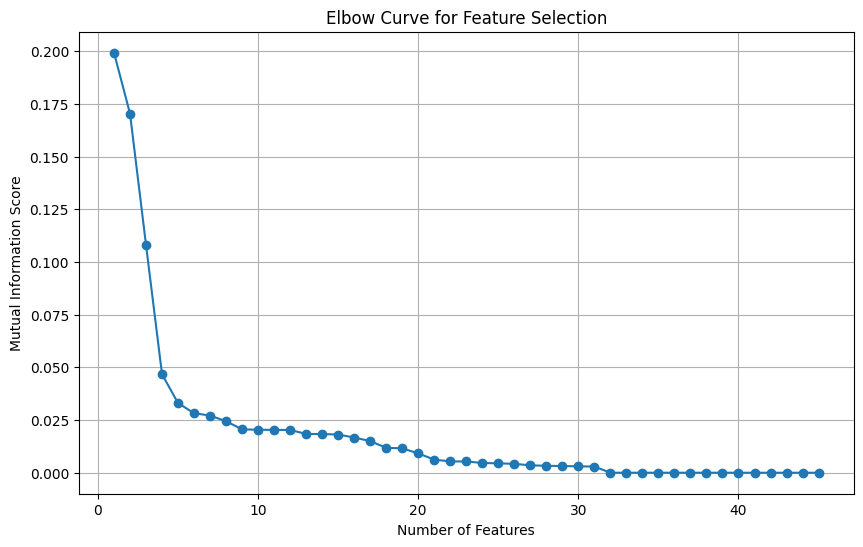

In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Define dependent variable
TARGET = "do you currently have a mental health disorder? (No=0, Yes=1)"
y = df[TARGET]

# Define independent variables, exclude unstructured text columns that couldn't be encoded directly
X = df.drop(columns=[ TARGET,
                     'why or why not?',
                     'why or why not?.1',
                     'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'])

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Sort the feature names and mutual information scores in descending order of the scores
features_scores = sorted(list(zip(X.columns, mi_scores)), key=lambda x: x[1], reverse=True)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features_scores) + 1), [score for name, score in features_scores], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mutual Information Score')
plt.title('Elbow Curve for Feature Selection')
plt.grid(True)
plt.show()

In [20]:
top_features = []
print(f"Top features:")
for feature, score in features_scores:
  print(f"{feature}: {score}")
  top_features.append(feature)
len(top_features)

Top features:
have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2): 0.19924851172795388
have you ever sought treatment for a mental health disorder from a mental health professional?: 0.17034889652881136
do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2): 0.10800994428053823
have you ever discussed your mental health with coworkers?: 0.04668613900344476
have you ever discussed your mental health with your employer?: 0.03302279164755628
what is your race? (American Indian or Alaska Native=0, Asian=1, Black or African American=2, Caucasian=3, European American=4, Hispanic=5, I prefer not to answer=6, Missing=7, More than one of the above=8, White=9, White Hispanic=10): 0.028236646819128852
have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? (Maybe=0, No=1, Yes=2): 0.0271126305750371
are you openly identified at work as a person with a mental health

45

["have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)",
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 "do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)",
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'what is your race? (American Indian or Alaska Native=0, Asian=1, Black or African American=2, Caucasian=3, European American=4, Hispanic=5, I prefer not to answer=6, Missing=7, More than one of the above=8, White=9, White Hispanic=10)',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? (Maybe=0, No=1, Yes=2)',
 'are you openly identified at work as a person with a mental health issue?',
 'what country do you live in? (Afghanistan=0, Albania=1, Argentina=2, Aruba=3, Australia=4, Austria=5, Bangladesh=6, Bel

['have you had a mental health disorder in the past?',
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 'do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'what is your race?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'are you openly identified at work as a person with a mental health issue?',
 'what country do you live in?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']

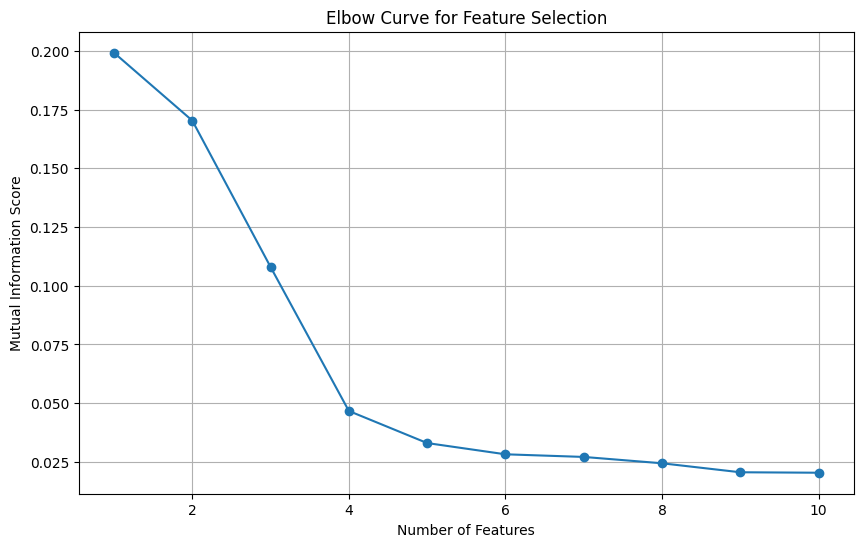

In [21]:
# Print the first n features
n = 10
display(top_features[:n])
print()

# Print the first n features based on the original names before label encoding
filtered_names = []
for feature in top_features[:n]:
  for name in df_names:
    if name in feature:
            filtered_names.append(name)
display(filtered_names)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features_scores[:n]) + 1), [score for name, score in features_scores[:n]], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mutual Information Score')
plt.title('Elbow Curve for Feature Selection')
plt.grid(True)
plt.show()

In [ ]:
# df[top_features].to_csv('cleaned_data(trim30_v4).csv', index=False)

In [48]:
print(len('have you ever discussed your mental health with coworkers?'))

58


["have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)",
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 "do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)",
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? (Maybe=0, No=1, Yes=2)',
 'are you openly identified at work as a person with a mental health issue?',
 "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)",
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more 

['have you had a mental health disorder in the past?',
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 'do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'are you openly identified at work as a person with a mental health issue?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?']

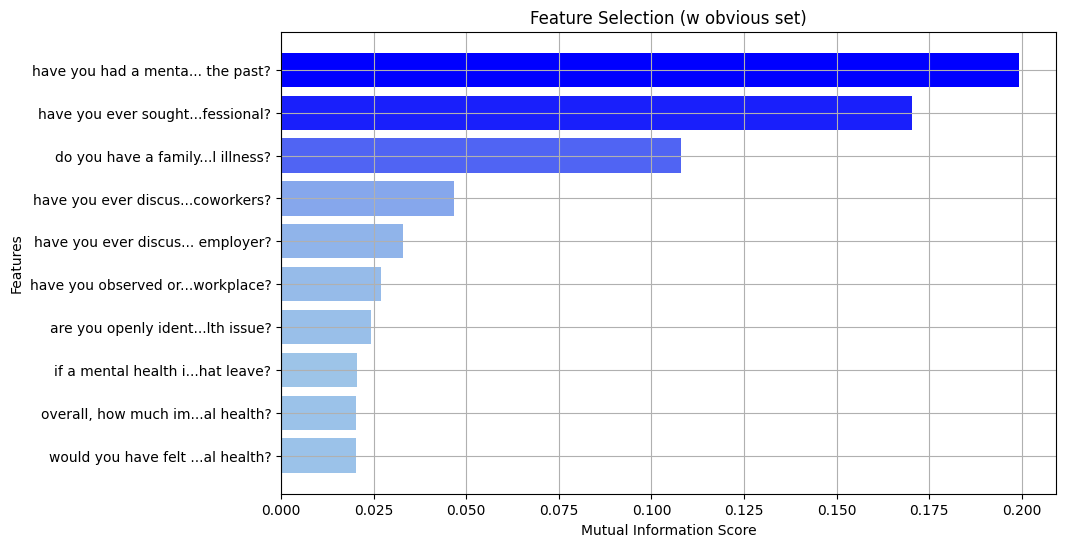

In [57]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Print the first n features without specific columns
n = 10

# Remove specific columns from columns
# OBVIOUS = ['have you had a mental health disorder in the past?','are you openly identified at work as a person with a mental health issue?','have you ever sought treatment for a mental health disorder from a mental health professional?']
IRRELEVANT =  ['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']

# TO_REMOVE = OBVIOUS + IRRELEVANT
TO_REMOVE = IRRELEVANT

col_all = top_features.copy()
for obv_col in TO_REMOVE:
    for col in top_features:
      if obv_col in col:
          # print(f"'{col}',")
          # trimmed_cols.append(col)
          col_all.remove(col)
display(col_all[:n])
print()

# # Filter features_scores to only include names present in col_all[:n]
filtered_features_scores = [(name, score) for name, score in features_scores if name in col_all[:n]]
# display(filtered_features_scores)
# print()

filtered_names = []
for feature, score in filtered_features_scores:
  for name in df_names:
    if name in feature:
            filtered_names.append(name)
display(filtered_names)
print()

# Prepare labels and scores
labels = [name[:20] + '...'+ name[-10:] if len(name) > 30 else name for name in filtered_names]
scores = [score for name, score in filtered_features_scores]

# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightblue","blue"])

# Add a small random noise to scores
scores = [score + np.random.uniform(-0.001, 0.001) for score in scores]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, [score for name, score in filtered_features_scores], color=cmap(scores / max(scores)))
plt.ylabel('Features')
plt.xlabel('Mutual Information Score')
plt.title('Feature Selection (w obvious set)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest score at the top
plt.grid(True)
plt.show()

["do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)",
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? (Maybe=0, No=1, Yes=2)',
 "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)",
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health? (Mental health=0, None=1, Physical health=2, Same level of comfort for each=3)',
 'would you feel more comfortable talking to your coworkers about your physical healt

['do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
 'would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'overall, how well do you think the tech industry supports employees with mental health issues?',
 'how willing would you be to share with friends and family that you have a mental illness?']

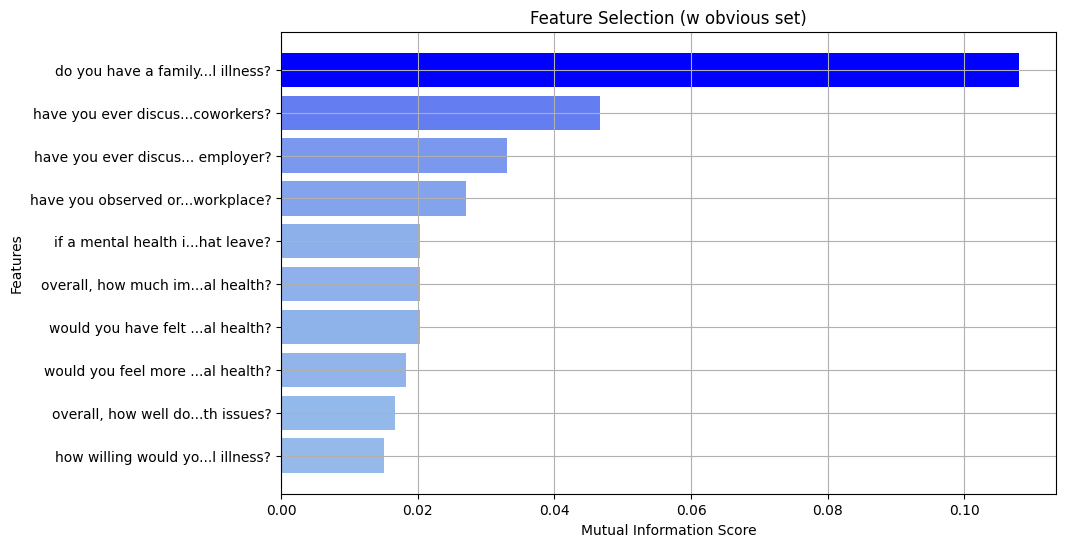

In [55]:
# Print the first n features without specific columns
n = 10

# Remove specific columns from columns
OBVIOUS = ['have you had a mental health disorder in the past?','are you openly identified at work as a person with a mental health issue?','have you ever sought treatment for a mental health disorder from a mental health professional?']
IRRELEVANT =  ['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']

TO_REMOVE = OBVIOUS + IRRELEVANT

col_all = top_features.copy()
for obv_col in TO_REMOVE:
    for col in top_features:
      if obv_col in col:
          # print(f"'{col}',")
          # trimmed_cols.append(col)
          col_all.remove(col)
display(col_all[:n])
print()

# # Filter features_scores to only include names present in col_all[:n]
filtered_features_scores = [(name, score) for name, score in features_scores if name in col_all[:n]]
# display(filtered_features_scores)
# print()

filtered_names = []
for feature, score in filtered_features_scores:
  for name in df_names:
    if name in feature:
            filtered_names.append(name)
display(filtered_names)
print()

# Prepare labels and scores
labels = [name[:20] + '...'+ name[-10:] if len(name) > 30 else name for name in filtered_names]
scores = [score for name, score in filtered_features_scores]

# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightblue","blue"])

# Add a small random noise to scores
scores = [score + np.random.uniform(-0.001, 0.001) for score in scores]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, [score for name, score in filtered_features_scores], color=cmap(scores / max(scores)))
plt.ylabel('Features')
plt.xlabel('Mutual Information Score')
plt.title('Feature Selection (w obvious set)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest score at the top
plt.grid(True)
plt.show()

In [ ]:
# text_cols = ['do you currently have a mental health disorder? (No=0, Yes=1)',
#                      'why or why not?',
#                      'why or why not?.1',
#                      'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']
# df[top_features + text_cols].to_csv('cleaned_data(trim30wOpen_v4).csv', index=False)